(chapter9_part2)=


## Boosting Models

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 


This notebook is a supplement for *Chapter 9. Ensemble Models* of **Machine Learning For Everyone** book.

## 1. Required Libraries, Data & Variables

Let's import the data and have a look at it:

In [1]:
import pandas as pd

data = {
    'Day': list(range(1, 31)),
    'Temperature': [
        'Cold', 'Hot', 'Cold', 'Hot', 'Hot',
        'Cold', 'Hot', 'Cold', 'Hot', 'Cold',
        'Hot', 'Cold', 'Hot', 'Cold', 'Hot',
        'Cold', 'Hot', 'Cold', 'Hot', 'Cold',
        'Hot', 'Cold', 'Hot', 'Cold', 'Hot',
        'Cold', 'Hot', 'Cold', 'Hot', 'Cold'
    ],
    'Humidity': [
        'Normal', 'Normal', 'Normal', 'High', 'High',
        'Normal', 'High', 'Normal', 'High', 'Normal',
        'High', 'Normal', 'High', 'Normal', 'High',
        'Normal', 'High', 'Normal', 'High', 'Normal',
        'High', 'Normal', 'High', 'Normal', 'High',
        'Normal', 'High', 'Normal', 'High', 'Normal'
    ],
    'Outlook': [
        'Rain', 'Rain', 'Sunny', 'Sunny', 'Rain',
        'Sunny', 'Rain', 'Sunny', 'Rain', 'Sunny',
        'Rain', 'Sunny', 'Rain', 'Sunny', 'Rain',
        'Sunny', 'Rain', 'Sunny', 'Rain', 'Sunny',
        'Rain', 'Sunny', 'Rain', 'Sunny', 'Rain',
        'Sunny', 'Rain', 'Sunny', 'Rain', 'Sunny'
    ],
    'Wind': [
        'Strong', 'Weak', 'Weak', 'Weak', 'Weak',
        'Strong', 'Weak', 'Weak', 'Weak', 'Strong',
        'Weak', 'Weak', 'Strong', 'Weak', 'Weak',
        'Weak', 'Strong', 'Weak', 'Weak', 'Weak',
        'Strong', 'Weak', 'Weak', 'Weak', 'Weak',
        'Strong', 'Weak', 'Weak', 'Weak', 'Strong'
    ],
    'Golf Played': [
        'No', 'No', 'Yes', 'Yes', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes'
    ]
}

# Converting the dictionary into a DataFrame
df = pd.DataFrame(data)

In [2]:
# Displaying the DataFrame
df.head(10)

,Day,Temperature,Humidity,Outlook,Wind,Golf Played
0,1,Cold,Normal,Rain,Strong,No
1,2,Hot,Normal,Rain,Weak,No
2,3,Cold,Normal,Sunny,Weak,Yes
3,4,Hot,High,Sunny,Weak,Yes
4,5,Hot,High,Rain,Weak,Yes
5,6,Cold,Normal,Sunny,Strong,No
6,7,Hot,High,Rain,Weak,Yes
7,8,Cold,Normal,Sunny,Weak,No
8,9,Hot,High,Rain,Weak,Yes
9,10,Cold,Normal,Sunny,Strong,Yes


## 2. Preparation of the Dataset

One-hot encoding the categorical variables

In [3]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Temperature', 'Humidity', 'Outlook', 'Wind']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Temperature', 'Humidity', 'Outlook', 'Wind']))

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Visualizing the first 10 records of the encoded dataframe:

In [4]:
encoded_df.head(10)

,Temperature_Cold,Temperature_Hot,Humidity_High,Humidity_Normal,Outlook_Rain,Outlook_Sunny,Wind_Strong,Wind_Weak
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
5,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
9,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Adding the encoded features back to the dataframe

In [5]:
df = df.join(encoded_df)

df.head(5)

,Day,Temperature,Humidity,Outlook,Wind,Golf Played,Temperature_Cold,Temperature_Hot,Humidity_High,Humidity_Normal,Outlook_Rain,Outlook_Sunny,Wind_Strong,Wind_Weak
0,1,Cold,Normal,Rain,Strong,No,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2,Hot,Normal,Rain,Weak,No,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,3,Cold,Normal,Sunny,Weak,Yes,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,4,Hot,High,Sunny,Weak,Yes,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,Hot,High,Rain,Weak,Yes,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


Preparing the features by removing categorical variables.

In [6]:
X = df.drop(['Day', 'Temperature', 'Humidity', 'Outlook', 'Wind', 'Golf Played'], axis=1)
X.head(5)

,Temperature_Cold,Temperature_Hot,Humidity_High,Humidity_Normal,Outlook_Rain,Outlook_Sunny,Wind_Strong,Wind_Weak
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


Defining y:

In [7]:
y = df['Golf Played']

y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10     No
11    Yes
12     No
13    Yes
14    Yes
15     No
16    Yes
17     No
18    Yes
19    Yes
20     No
21    Yes
22     No
23    Yes
24    Yes
25     No
26    Yes
27     No
28    Yes
29    Yes
Name: Golf Played, dtype: object

Splitting the dataset into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Boosting Ensemble

### 3.1. Building a Boosting Ensemble

Creating the Gradient Boosting classifier

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
# Creating the Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=5, 
                                   learning_rate=0.1, 
                                   max_depth=3, 
                                   random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=5, random_state=42)

### 3.2. Visualizing boosted ensemble

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

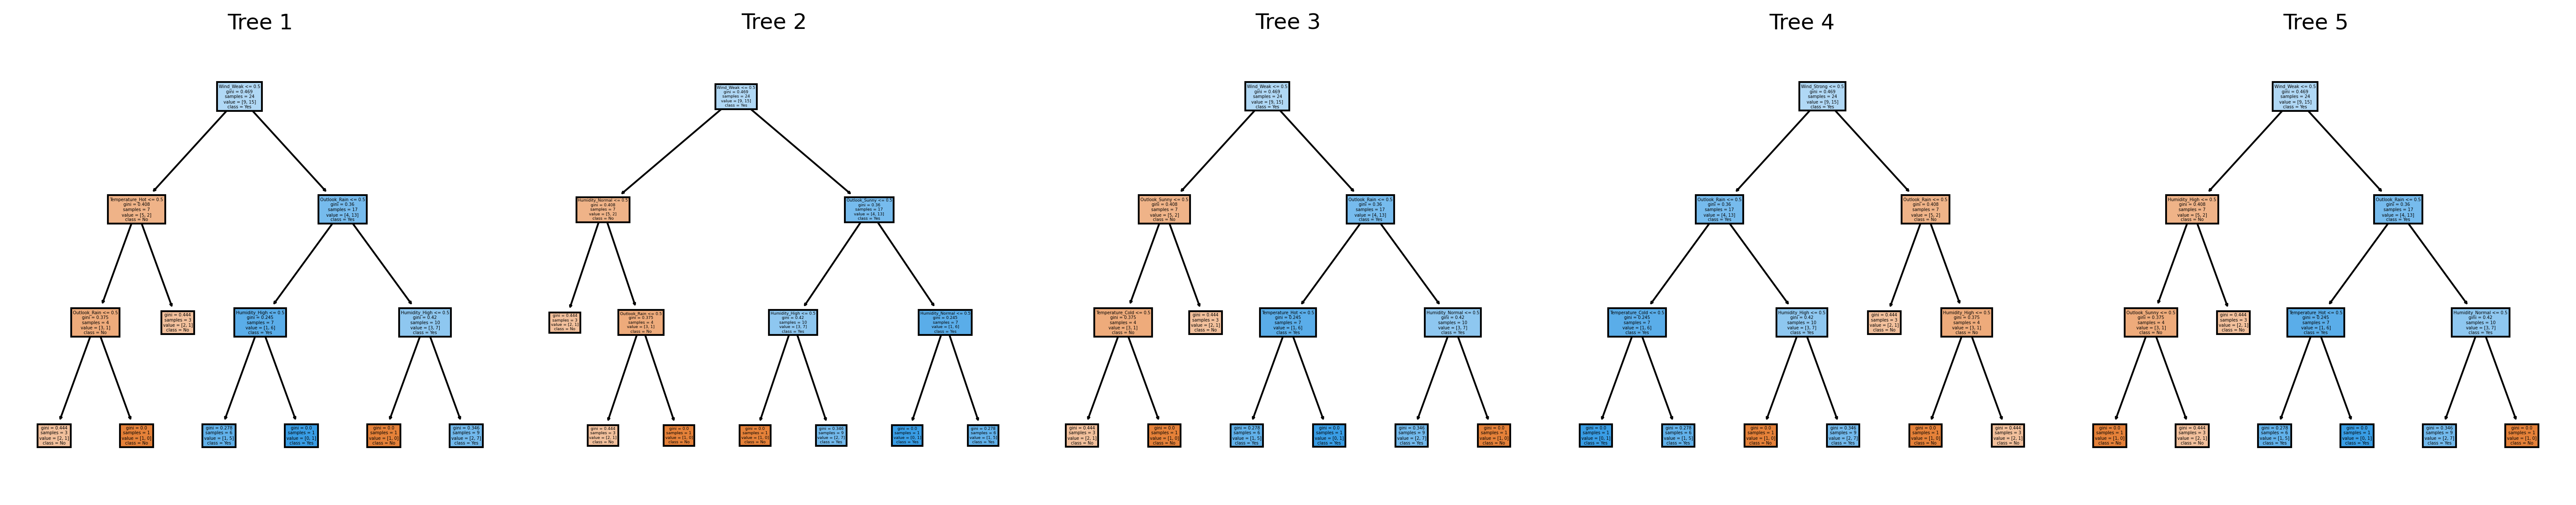

In [12]:
# Building 5 decision trees
feature_names = encoder.get_feature_names_out(['Temperature', 'Humidity', 'Outlook', 'Wind'])
trees = [DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42 + i) for i in range(5)]
for tree in trees:
    tree.fit(X_train, y_train)

# Plotting all 5 trees
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), dpi=300)
for i, tree in enumerate(trees):
    plot_tree(tree, feature_names=feature_names, class_names=['No', 'Yes'], filled=True, ax=axes[i])
    axes[i].set_title(f'Tree {i+1}')

plt.tight_layout()
plt.show()

### 3.3. Feature Importance

In [13]:
import numpy as np
import matplotlib.pyplot as plt

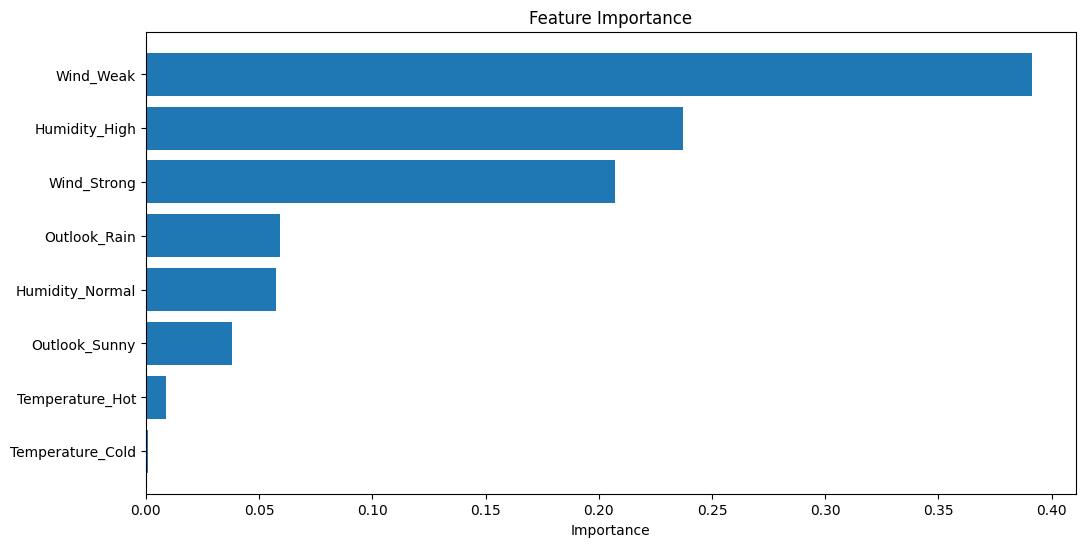

In [14]:
# Feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plotting Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


### 3.4. Predicting the Results

Predicting the test set results

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

### 3.5. Evaluating the model

In [17]:
from sklearn.metrics import accuracy_score, classification_report

In [18]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00         3
         Yes       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## 4. Adaboost Algorithm

To implement the AdaBoost algorithm using the same dataset and scikit-learn library, we'll use the `AdaBoostClassifier`. AdaBoost (Adaptive Boosting) works by combining multiple weak classifiers into a single strong classifier. Each subsequent classifier focuses more on the samples that were misclassified by the previous ones, improving the ensemble's overall accuracy.

### 4.1. Building a Boosting Ensemble

Creating the Random Forest Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Creating and training the AdaBoost Classifier
# Using a DecisionTreeClassifier as the base classifier

base_estimator = DecisionTreeClassifier(max_depth=1)  # a stump (tree with depth 1)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

### 4.2. Predicting the Results

In [21]:
# Making predictions on the test set
y_pred = adaboost.predict(X_test)

y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'], dtype=object)

### 4.3. Evaluating the model

In [22]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00         3
         Yes       0.40      0.67      0.50         3

    accuracy                           0.33         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.20      0.33      0.25         6

